### Trying to create a model for county by county data for Wisconsin.
- Used the combined data from 2018-19 to 2022-23.
- For 2018-19 academic year, used the population and income data for the year 2018, and so on.
- Income and population data retrieved from the CAINC1 data file released by bea.gov.
- The county ('Shawano') present in Wisconsin AP data but not in CAINC1 file has been manually retrieved (population from census.gov and income from federal reserve in St. Louis).
- Used geopy to compute the average distance between counties and university. We take the five closest universities to compute the average distance.
### Also did statistical analysis with statsmodels
- Percentage of 3 or above score (AKA pass rate) is used as the target variable.
- Per capita income, population and average distance to five closest R1R2, public, private (not for profit), stem and landgrant universities, as well as average enrollment in them are used as features.
- Full model includes all features.
- Uni metric model includes the 15 university related metrics as features.
- Non-uni model includes per capita and population as features.
- The p-values are all small. Might be reflective of the fact that none of the features are very accurate at predicting the pass rates, so adding more features makes some improvements to the models.
### Also did modelling with sklearn and xgboost
- Amongst the linear models, considered the ordinary least squares (OLS) linear regression (with aforementioned three types of models), PCA-then-linear-regression model (with n-components = 0.95), Ridge model.
- The PCA reduced the 17 features to 9 when set n-components=0.95.
- Additionally, considered Adaboost, Random Forest and Xgboost.
- Did 5-fold cross validation, and compared the average root mean square errors (rmse) of the models.
- Random Forest has the lowest average rmse, followed closely by Adaboost and Xgboost.
- Also created the summary plots with shap.
### Summarizing RMSE's on 5-Fold cross-validation of various models:
- "Take average and call it a day" model: 13.8952139409969
- OLS full model (sklearn): 11.932550600513991
- Ridge model (sklearn): 11.897170135820051
- PCA(0.95) model (sklearn): 12.69751393720681
- Xgboost model with full features: 10.375916506550167
- Adaboost model with full features: 10.21439481594243
- Random forest with full features: 9.864063244708746
### Summarizing R-squared scores on 5-Fold cross-validation of various models:
- "Take average and call it a day" model: -0.029081278912817865
- OLS full model (sklearn): 0.23648796721768353
- Ridge model (sklearn): 0.24186868624183272
- PCA(0.95) model (sklearn): 0.13716467736070584
- Xgboost model with full features: 0.42505004679532987
- Adaboost model with full features: 0.4438950622508033
- Random forest with full features: 0.4800473695757117
### In the end, we run our model of choice (Random Forest) on the testing data.
- The RMSE of our prediction is 7.038.
- The $R^2$-coefficient of our prediction is 0.422. That is, the model captures roughly 42.2% of the variation of the testing data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
pd.read_csv('../data/Wisconsin/train_test_split/Wisconsin_closest_five_method.csv')

,Unnamed: 0,COUNTY,STUDENTS_TESTED,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE,Year,Latitude,Longitude,population,...,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
0,0,Adams,45,76,22,28.947368,2018,43.9696,-89.7704,20533,...,27064.0,19895.2,2104.8,22515.6,18673.8,5303.4,2810.4,717.8,3257.0,3560.6
1,1,Ashland,30,40,25,62.500000,2018,46.3148,-90.6781,16013,...,32411.8,4791.8,1589.6,13358.4,24446.6,5696.8,733.6,470.4,1502.8,3910.4
2,2,Barron,132,196,101,51.530612,2018,45.4237,-91.8483,46385,...,33726.6,8040.4,2396.0,13358.4,24446.6,7165.0,1452.2,718.8,1502.8,3910.4
3,3,Bayfield,10,14,9,64.285714,2018,46.5237,-91.2009,15872,...,32768.4,4791.8,1589.6,13358.4,27023.8,5750.4,733.6,470.4,1502.8,5023.0
4,4,Brown,2207,3378,2356,69.745411,2018,44.4525,-88.0037,266371,...,27215.0,13383.6,2012.2,9798.8,23576.2,5328.0,875.2,867.4,1774.2,4383.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,344,Waukesha,6439,11372,8537,75.070348,2022,43.0182,-88.3045,410434,...,27215.0,15274.4,1273.2,30553.4,23576.2,5328.0,1596.6,517.0,8082.0,4383.4
345,345,Waupaca,334,460,243,52.826087,2022,44.4705,-88.9648,51488,...,27064.0,12265.2,1464.4,22515.6,22189.6,5303.4,1036.2,953.2,3257.0,4480.6
346,346,Waushara,60,90,38,42.222222,2022,44.1131,-89.2429,24999,...,27064.0,10705.2,2084.0,22515.6,22189.6,5303.4,1036.2,953.2,3257.0,4480.6
347,347,Winnebago,840,1122,780,69.518717,2022,44.0689,-88.6446,170718,...,27064.0,12610.2,1996.4,9798.8,23576.2,5303.4,485.2,1057.8,1774.2,4383.4


In [4]:
training = pd.read_csv('../data/Wisconsin/train_test_split/training.csv')

In [5]:
training

,Unnamed: 0,COUNTY,STUDENTS_TESTED,EXAM_COUNT,EXAMS_3_OR_ABOVE,PERCENT_3_OR_ABOVE,Year,Latitude,Longitude,population,...,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
0,124,Sauk,674,1046,612,58.508604,2019,43.4267,-89.9482,65586,...,28789.0,18208.8,2322.8,29555.6,22189.6,5812.6,2876.2,659.4,5587.6,4480.6
1,31,Lafayette,87,128,54,42.187500,2018,42.6605,-90.1317,16631,...,28789.0,16490.0,1105.8,40912.2,23072.4,5812.6,2271.8,580.6,8589.0,5085.2
2,93,Iowa,110,150,89,59.333333,2019,43.0005,-90.1354,23688,...,28789.0,16490.0,1801.8,29555.6,22189.6,5812.6,2271.8,514.8,5587.6,4480.6
3,113,Ozaukee,1675,3158,2398,75.934136,2019,43.3840,-87.9509,90998,...,27215.0,13718.0,2760.4,30553.4,23576.2,5328.0,727.4,737.4,8082.0,4383.4
4,183,Ozaukee,1603,3110,2143,68.906752,2020,43.3840,-87.9509,91613,...,27215.0,13718.0,2760.4,30553.4,23576.2,5328.0,727.4,737.4,8082.0,4383.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,212,Barron,130,226,122,53.982301,2021,45.4237,-91.8483,46746,...,33726.6,8040.4,2396.0,13358.4,24446.6,7165.0,1452.2,718.8,1502.8,3910.4
275,204,Washington,1467,2457,1846,75.132275,2020,43.3685,-88.2307,136784,...,27215.0,13718.0,2207.4,30553.4,23576.2,5328.0,727.4,488.8,8082.0,4383.4
276,213,Bayfield,8,10,6,60.000000,2021,46.5237,-91.2009,16304,...,32768.4,4791.8,1589.6,13358.4,27023.8,5750.4,733.6,470.4,1502.8,5023.0
277,138,Winnebago,1012,1338,939,70.179372,2019,44.0689,-88.6446,171875,...,27064.0,12610.2,1996.4,9798.8,23576.2,5303.4,485.2,1057.8,1774.2,4383.4


In [6]:
columns = training.columns[1:]

In [7]:
training = training[columns]

In [8]:
features = list(training.columns[8:])
features

['population',
 'per_capita_income',
 'closest_five_r1r2_avg',
 'closest_five_public_avg',
 'closest_five_private_nfp_avg',
 'closest_five_landgrnt_avg',
 'closest_five_stem_avg',
 'closest_five_avg_enrollment_r1r2',
 'closest_five_avg_enrollment_public',
 'closest_five_avg_enrollment_private_nfp',
 'closest_five_avg_enrollment_landgrnt',
 'closest_five_avg_enrollment_stem',
 'closest_five_avg_dormrooms_r1r2',
 'closest_five_avg_dormrooms_public',
 'closest_five_avg_dormrooms_private_nfp',
 'closest_five_avg_dormrooms_landgrant',
 'closest_five_avg_dormrooms_stem']

In [9]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(training, test_size = 0.2, random_state = 226)

### Let's do some statistical analysis with statsmodels

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
x_train = training.drop(['COUNTY','STUDENTS_TESTED','EXAM_COUNT','EXAMS_3_OR_ABOVE','PERCENT_3_OR_ABOVE','Year','Latitude','Longitude'],axis=1)
y_train = training[['PERCENT_3_OR_ABOVE']]
X_train = sm.add_constant(x_train)
unimetric_train = X_train.drop(['population','per_capita_income'],axis=1)
X_train

,const,population,per_capita_income,closest_five_r1r2_avg,closest_five_public_avg,closest_five_private_nfp_avg,closest_five_landgrnt_avg,closest_five_stem_avg,closest_five_avg_enrollment_r1r2,closest_five_avg_enrollment_public,closest_five_avg_enrollment_private_nfp,closest_five_avg_enrollment_landgrnt,closest_five_avg_enrollment_stem,closest_five_avg_dormrooms_r1r2,closest_five_avg_dormrooms_public,closest_five_avg_dormrooms_private_nfp,closest_five_avg_dormrooms_landgrant,closest_five_avg_dormrooms_stem
0,1.0,65586,52266,102.934660,49.119866,54.126134,149.798787,93.728419,28789.0,18208.8,2322.8,29555.6,22189.6,5812.6,2876.2,659.4,5587.6,4480.6
1,1.0,16631,42307,93.067423,37.142154,30.704517,165.243556,91.579850,28789.0,16490.0,1105.8,40912.2,23072.4,5812.6,2271.8,580.6,8589.0,5085.2
2,1.0,23688,49996,96.378027,36.954639,42.626467,159.078732,94.292621,28789.0,16490.0,1801.8,29555.6,22189.6,5812.6,2271.8,514.8,5587.6,4480.6
3,1.0,90998,83681,62.268640,26.951514,18.219438,147.796071,47.660966,27215.0,13718.0,2760.4,30553.4,23576.2,5328.0,727.4,737.4,8082.0,4383.4
4,1.0,91613,86875,62.268640,26.951514,18.219438,147.796071,47.660966,27215.0,13718.0,2760.4,30553.4,23576.2,5328.0,727.4,737.4,8082.0,4383.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1.0,46746,56928,195.732903,35.324977,65.023942,111.861269,165.205598,33726.6,8040.4,2396.0,13358.4,24446.6,7165.0,1452.2,718.8,1502.8,3910.4
275,1.0,136784,61808,62.132708,27.269314,21.229412,150.685941,47.293007,27215.0,13718.0,2207.4,30553.4,23576.2,5328.0,727.4,488.8,8082.0,4383.4
276,1.0,16304,53818,217.467712,45.942342,88.605454,109.668803,196.467183,32768.4,4791.8,1589.6,13358.4,27023.8,5750.4,733.6,470.4,1502.8,5023.0
277,1.0,171875,48651,106.282559,26.507264,27.786313,140.659323,92.258473,27064.0,12610.2,1996.4,9798.8,23576.2,5303.4,485.2,1057.8,1774.2,4383.4


In [12]:
full_model = sm.OLS(y_train,X_train).fit()
unimetric_model = sm.OLS(y_train,unimetric_train).fit()
nonuni_model = smf.ols('PERCENT_3_OR_ABOVE ~ per_capita_income + population', data=training).fit()
unidistance_model = smf.ols('PERCENT_3_OR_ABOVE ~ closest_five_r1r2_avg + closest_five_public_avg + closest_five_private_nfp_avg + closest_five_landgrnt_avg + closest_five_stem_avg', data = training).fit()
pci_model=smf.ols('PERCENT_3_OR_ABOVE ~ per_capita_income', data =training).fit()

In [13]:
f_test_nonuni = full_model.compare_f_test(nonuni_model)
f_test_unimetric = full_model.compare_f_test(unimetric_model)
f_test_unidistance = unimetric_model.compare_f_test(unidistance_model)
print("p-value of full compared to non-university metric model:", f_test_nonuni[1])
print("p-value of full compared to university metric model:", f_test_unimetric[1])
print("p-value of university metric compared to university distance model:", f_test_unidistance[1])

p-value of full compared to non-university metric model: 3.731663573638362e-09
p-value of full compared to university metric model: 2.2652849024398932e-06
p-value of university metric compared to university distance model: 5.445215210755048e-10


### All three p-values are small, which is probably indicative of the fact that models are not as accurate as we would want, so adding more features makes decent improvements.

# Next, let's create some models with sklearn

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [15]:
uni_features = list(training.columns[10:])
nonuni_features = list(training.columns[8:10])
features_wo_dormrooms = list(training.columns[8:-5])
coordinates = ['Latitude','Longitude']
features_wo_dormrooms

['population',
 'per_capita_income',
 'closest_five_r1r2_avg',
 'closest_five_public_avg',
 'closest_five_private_nfp_avg',
 'closest_five_landgrnt_avg',
 'closest_five_stem_avg',
 'closest_five_avg_enrollment_r1r2',
 'closest_five_avg_enrollment_public',
 'closest_five_avg_enrollment_private_nfp',
 'closest_five_avg_enrollment_landgrnt',
 'closest_five_avg_enrollment_stem']

In [16]:
fullmodel = LinearRegression()
fullmodel.fit(train[features],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [17]:
unimodel = LinearRegression()
unimodel.fit(train[uni_features],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [18]:
nonunimodel = LinearRegression()
nonunimodel.fit(train[nonuni_features],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [19]:
wodormrooms_model = LinearRegression()
wodormrooms_model.fit(train[features_wo_dormrooms],train['PERCENT_3_OR_ABOVE'])

LinearRegression()

In [20]:
fullmodel.intercept_

np.float64(-24.777941217791586)

In [21]:
fullmodel.coef_

array([ 8.20889080e-06,  4.70234786e-04, -3.30046405e-01, -4.51564391e-01,
        1.30799069e-02,  3.64073487e-01,  4.17141822e-01,  2.36006125e-03,
        3.53032499e-04,  1.12999487e-03, -7.23769531e-04, -7.60608198e-04,
       -2.75842259e-03, -5.87959149e-03, -2.14687933e-02,  6.55804818e-04,
        2.83156877e-03])

In [22]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [23]:
print(f"full model rmse:",root_mean_squared_error(fullmodel.predict(validation[features]),validation['PERCENT_3_OR_ABOVE']))
print(f"full model R-squared score:",fullmodel.score(validation[features],validation['PERCENT_3_OR_ABOVE']))

full model rmse: 11.214526552861093
full model R-squared score: 0.20170236217271165


In [24]:
print(f"uni model rmse:",root_mean_squared_error(unimodel.predict(validation[uni_features]),validation['PERCENT_3_OR_ABOVE']))
print(f"uni model R-squared score:",unimodel.score(validation[uni_features],validation['PERCENT_3_OR_ABOVE']))

uni model rmse: 11.934226606928545
uni model R-squared score: 0.09595194327923817


In [25]:
print(f"non uni model rmse:",root_mean_squared_error(nonunimodel.predict(validation[nonuni_features]),validation['PERCENT_3_OR_ABOVE']))
print(f"non uni model R-squared score:",nonunimodel.score(validation[nonuni_features],validation['PERCENT_3_OR_ABOVE']))

non uni model rmse: 11.445541121697305
non uni model R-squared score: 0.16847441365011095


In [26]:
print(f"w/o dormrooms model rmse:",root_mean_squared_error(wodormrooms_model.predict(validation[features_wo_dormrooms]),validation['PERCENT_3_OR_ABOVE']))
print(f"w/o dormrooms model R-squared score:",wodormrooms_model.score(validation[features_wo_dormrooms],validation['PERCENT_3_OR_ABOVE']))

w/o dormrooms model rmse: 11.82523767830244
w/o dormrooms model R-squared score: 0.11238892168900161


**Full model performs the best on the validation data, followed by nonuni model, then wodormrooms model and uni model. All have positive R-squared score, albeit small.**

### Let's do 5-Fold cross-validation for the four models.

In [27]:
## import KFold and kNeighborsRegressor here
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

In [28]:
num_splits = 5
num_models = 5
kfold = KFold(num_splits,
              random_state = 226,
              shuffle=True)
## This array will hold the mse for each model and split
rmses = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(training):
    ## cv training set
    wisconsin_train = training.iloc[train_index]
    
    ## cv holdout set
    wisconsin_holdout = training.iloc[test_index]
    
    ## "Fit" and get ho mse for the "take the mean and call it a day" model
    baseline_pred = wisconsin_train['PERCENT_3_OR_ABOVE'].mean()*np.ones(len(wisconsin_holdout))
    
    rmses[0, i] = root_mean_squared_error(wisconsin_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    
    ## Fit and get ho mse for full model
    full_lr = LinearRegression()
    
    full_lr.fit(wisconsin_train[features],wisconsin_train['PERCENT_3_OR_ABOVE'])
    
    rmses[1, i] = root_mean_squared_error(wisconsin_holdout['PERCENT_3_OR_ABOVE'], full_lr.predict(wisconsin_holdout[features]))
    
    
    ## Fit and get ho mse for nonuni model
    nonuni_lr = LinearRegression()
    
    nonuni_lr.fit(wisconsin_train[nonuni_features],wisconsin_train['PERCENT_3_OR_ABOVE'])
    
    rmses[2, i] = root_mean_squared_error(wisconsin_holdout['PERCENT_3_OR_ABOVE'], nonuni_lr.predict(wisconsin_holdout[nonuni_features]))
    
    ## Fit and get ho mse for uni model
    uni_lr = LinearRegression()

    uni_lr.fit(wisconsin_train[uni_features],wisconsin_train['PERCENT_3_OR_ABOVE'])
    
    rmses[3, i] = root_mean_squared_error(wisconsin_holdout['PERCENT_3_OR_ABOVE'], uni_lr.predict(wisconsin_holdout[uni_features]))

    ## Fit and get ho mse for no dorm rooms model

    nodorm_lr = LinearRegression()

    nodorm_lr.fit(wisconsin_train[features_wo_dormrooms],wisconsin_train['PERCENT_3_OR_ABOVE'])

    rmses[4, i] = root_mean_squared_error(wisconsin_holdout['PERCENT_3_OR_ABOVE'], nodorm_lr.predict(wisconsin_holdout[features_wo_dormrooms]))

    i = i+1


In [29]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"fullmodel Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"nonuni model Avg. CV RMSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"uni model Avg. CV RMSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")
print(f"no dorm rooms model Avg. CV RMSE: {np.mean(rmses[4,:])} and STD: {np.std(rmses[4,:])}")

Baseline Avg. CV RMSE: 13.8952139409969 and STD: 1.0814455082287104
fullmodel Avg. CV RMSE: 11.932550600513924 and STD: 0.5525042295597351
nonuni model Avg. CV RMSE: 12.7917917484458 and STD: 0.83153691794454
uni model Avg. CV RMSE: 12.480347156741185 and STD: 0.8005245009284365
no dorm rooms model Avg. CV RMSE: 12.43123604995362 and STD: 0.6116809137586939


### Full model performs clearly the best. The "no dorm rooms" model is the second best, though uni model is not far behind. While nonuni model lags behind, the difference is still not that big.
### Of course, we should choose the fullmodel from this this quartet.

**Now, let's do some PCA**

In [30]:
scaler = StandardScaler()
training_scaled = scaler.fit_transform(training[features])
training_scaled.shape

(279, 17)

In [31]:
pca = PCA(0.95)
training_pca = pca.fit_transform(training_scaled)

In [32]:
training_pca.shape

(279, 9)

In [33]:
pca.explained_variance_ratio_

array([0.41194672, 0.20111255, 0.10427498, 0.07210831, 0.06168245,
       0.040438  , 0.03217378, 0.02520899, 0.01566555])

**PCA can reduce the number of features from 17 to 9, if we require n-components = 0.95**

### **Comparing PCA model and Ridge model and the full model**

In [34]:
pca_pipe = Pipeline([('scale', StandardScaler()), ('pca', PCA(0.95)), ('reg', LinearRegression())])
ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])

In [35]:
pca_pipe.fit(train[features],train['PERCENT_3_OR_ABOVE'])
ridge_pipe.fit(train[features],train['PERCENT_3_OR_ABOVE'])

Pipeline(steps=[('scale', StandardScaler()), ('ridge', Ridge())])

In [36]:
print(f"pca(0.95) model rmse:",root_mean_squared_error(pca_pipe.predict(validation[features]),validation['PERCENT_3_OR_ABOVE']))
print(f"pca(0.95) model R-squared score:",pca_pipe.score(validation[features],validation['PERCENT_3_OR_ABOVE']))

pca(0.95) model rmse: 11.526864094606696
pca(0.95) model R-squared score: 0.15661610712942597


In [37]:
print(f"Ridge model rmse:",root_mean_squared_error(ridge_pipe.predict(validation[features]),validation['PERCENT_3_OR_ABOVE']))
print(f"Ridge model R-squared score:",ridge_pipe.score(validation[features],validation['PERCENT_3_OR_ABOVE']))

Ridge model rmse: 11.112743360619904
Ridge model R-squared score: 0.2161273231590357


**Ridge model performs better than even full model on the validation data. PCA(0.95) model falls behind.**

### Let's compare full model, ridge model and PCA model with 5-fold cross validation.

In [38]:
num_splits = 5
num_models = 4
kfold = KFold(num_splits,
              random_state = 226,
              shuffle=True)
## This array will hold the rmse for each model and split
rmses = np.zeros((num_models, num_splits))
rsquared = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(training):
    ## cv training set
    wisconsin_train = training.iloc[train_index]
    
    ## cv holdout set
    wisconsin_holdout = training.iloc[test_index]
    
    ## "Fit" and get ho mse for the baseline model
    baseline_pred = wisconsin_train['PERCENT_3_OR_ABOVE'].mean()*np.ones(len(wisconsin_holdout))
    
    rmses[0, i] = root_mean_squared_error(wisconsin_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    rsquared[0, i] = r2_score(wisconsin_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    
    ## Fit and get ho mse for full model
    full_lr = LinearRegression()
    
    full_lr.fit(wisconsin_train[features],wisconsin_train['PERCENT_3_OR_ABOVE'])
    
    rmses[1, i] = root_mean_squared_error(wisconsin_holdout['PERCENT_3_OR_ABOVE'], full_lr.predict(wisconsin_holdout[features]))
    rsquared[1, i] = full_lr.score(wisconsin_holdout[features],wisconsin_holdout['PERCENT_3_OR_ABOVE'])
    
    ## Fit and get ho mse for PCA model
    pca_pipe = Pipeline([('scale', StandardScaler()), ('pca', PCA(0.95)), ('reg', LinearRegression())])
    
    pca_pipe.fit(wisconsin_train[features],wisconsin_train['PERCENT_3_OR_ABOVE'])
    
    rmses[2, i] = root_mean_squared_error(wisconsin_holdout['PERCENT_3_OR_ABOVE'], pca_pipe.predict(wisconsin_holdout[features]))
    rsquared[2, i] = pca_pipe.score(wisconsin_holdout[features],wisconsin_holdout['PERCENT_3_OR_ABOVE'])
    
    ## Fit and get ho mse for Ridge model
    ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])

    ridge_pipe.fit(wisconsin_train[features],wisconsin_train['PERCENT_3_OR_ABOVE'])
    
    rmses[3, i] = root_mean_squared_error(wisconsin_holdout['PERCENT_3_OR_ABOVE'], ridge_pipe.predict(wisconsin_holdout[features]))
    rsquared[3, i] = ridge_pipe.score(wisconsin_holdout[features],wisconsin_holdout['PERCENT_3_OR_ABOVE'])

    i = i+1


In [39]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"fullmodel Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"PCA model Avg. CV RMSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"Ridge model Avg. CV RMSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")

Baseline Avg. CV RMSE: 13.8952139409969 and STD: 1.0814455082287104
fullmodel Avg. CV RMSE: 11.932550600513924 and STD: 0.5525042295597351
PCA model Avg. CV RMSE: 12.69751393720681 and STD: 0.806681002446189
Ridge model Avg. CV RMSE: 11.897170135820051 and STD: 0.5995223899876702


In [40]:
## Find the avg cv R-squared score for each model here
print(f"Baseline Avg. CV score: {np.mean(rsquared[0,:])} and STD: {np.std(rsquared[0,:])}")
print(f"fullmodel Avg. CV score: {np.mean(rsquared[1,:])} and STD: {np.std(rsquared[1,:])}")
print(f"PCA model Avg. CV score: {np.mean(rsquared[2,:])} and STD: {np.std(rsquared[2,:])}")
print(f"Ridge model Avg. CV score: {np.mean(rsquared[3,:])} and STD: {np.std(rsquared[3,:])}")

Baseline Avg. CV score: -0.029081278912817865 and STD: 0.03576008503798913
fullmodel Avg. CV score: 0.23648796721768353 and STD: 0.05686487370530274
PCA model Avg. CV score: 0.13716467736070584 and STD: 0.0634940527662994
Ridge model Avg. CV score: 0.24186868624183272 and STD: 0.048272341215667335


### Ridge model yelds the lowest average RMSE, though full model is not far behind. Full model has lower standard deviation on the RMSE's though.

### Ridge model also has the highest R-squared score. So, among the sklearn's linear regression models, Ridge appears to be the best.

# Let's create model using xgboost

In [41]:
import xgboost as xgb
xgb.__version__

'2.1.2'

In [42]:
X_train = train[features]
y_train = train['PERCENT_3_OR_ABOVE']
X_test = validation[features]
y_test = validation['PERCENT_3_OR_ABOVE']

In [43]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test,y_test,enable_categorical=True)

In [44]:


params = {"objective": "reg:squarederror", "tree_method": "hist"}   ## "hist" uses cpu to compute the model
n = 1000

evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

xgb_model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    verbose_eval=10,            # Print rmse val every 10 rounds
    early_stopping_rounds=100   # XGBoost will automatically stop the training if validation loss doesn't improve for 100 consecutive rounds
)

[0]	train-rmse:11.31673	validation-rmse:10.63973
[10]	train-rmse:3.25086	validation-rmse:9.52551
[20]	train-rmse:1.78601	validation-rmse:10.21327
[30]	train-rmse:1.13477	validation-rmse:10.26503
[40]	train-rmse:0.70844	validation-rmse:10.26203
[50]	train-rmse:0.50380	validation-rmse:10.25951
[60]	train-rmse:0.31230	validation-rmse:10.28440
[70]	train-rmse:0.22957	validation-rmse:10.29078
[80]	train-rmse:0.15494	validation-rmse:10.29641
[90]	train-rmse:0.10308	validation-rmse:10.30052
[100]	train-rmse:0.06781	validation-rmse:10.30036
[103]	train-rmse:0.06041	validation-rmse:10.30010


In [45]:
# Example: New data to predict
X_new = training[features].head(3)  ## just use the old data as a quick example

# Create a DMatrix for the new data
dnew_reg = xgb.DMatrix(X_new, enable_categorical=True)

# Make predictions
y_pred_new = xgb_model.predict(dnew_reg)

print('Predictions for new percentage of AP outcomes that scores 3-5:')
print(y_pred_new)

Predictions for new percentage of AP outcomes that scores 3-5:
[58.52509 42.20006 59.37463]


In [46]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=100
)

results.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,11.286491,0.411170,12.702540,1.420145
1,9.136603,0.251342,11.967372,1.136993
2,7.623404,0.156434,11.684826,0.894607
3,6.415809,0.142172,11.503246,0.887942
4,5.481073,0.241379,11.362735,0.758724


In [47]:
mean_train_rmse = results['train-rmse-mean'].iloc[-1]  # Final mean train RMSE
std_train_rmse = results['train-rmse-std'].iloc[-1]    # Final std dev train RMSE

mean_val_rmse = results['test-rmse-mean'].iloc[-1]     # Final mean validation RMSE
std_val_rmse = results['test-rmse-std'].iloc[-1]       # Final std dev validation RMSE

# Print results
print(f"Training RMSE: {mean_train_rmse:.4f} +/- {std_train_rmse:.4f}")
print(f"Validation RMSE: {mean_val_rmse:.4f} +/- {std_val_rmse:.4f}")

Training RMSE: 5.4811 +/- 0.2414
Validation RMSE: 11.3627 +/- 0.7587


# Creating RandomForestRegressor and Adaboost

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [49]:
import joblib

N_CORES = joblib.cpu_count(only_physical_cores=True)
print(f"Number of physical cores: {N_CORES}")

Number of physical cores: 4


In [50]:
random_forest = RandomForestRegressor(min_samples_leaf=5, random_state=0, n_jobs=N_CORES)
random_forest.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=5, n_jobs=4, random_state=0)

In [51]:
root_mean_squared_error(random_forest.predict(X_test),y_test)

np.float64(8.899709873913293)

In [52]:
random_forest.score(X_test,y_test)

0.49724701796802606

In [53]:
dtree_reg = DecisionTreeRegressor(max_depth=4)

In [54]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=226)

In [55]:
dtree_reg.fit(train[features], train['PERCENT_3_OR_ABOVE'])
ada_reg.fit(train[features], train['PERCENT_3_OR_ABOVE'])

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300, random_state=226)

In [56]:
root_mean_squared_error(dtree_reg.predict(validation[features]),validation['PERCENT_3_OR_ABOVE'])

np.float64(11.3774181465012)

In [57]:
dtree_reg.score(validation[features],validation['PERCENT_3_OR_ABOVE'])

0.1783433084446815

In [58]:
root_mean_squared_error(ada_reg.predict(validation[features]),validation['PERCENT_3_OR_ABOVE'])

np.float64(9.56582255690711)

In [59]:
ada_reg.score(validation[features],validation['PERCENT_3_OR_ABOVE'])

0.4191719278082847

### **5-Fold cross-validation comparison between Adaboost, Xgboost and RandomForest.**

In [60]:
num_splits = 5
num_models = 4
kfold = KFold(num_splits,
              random_state = 226,
              shuffle=True)
## This array will hold the rmse for each model and split
rmses = np.zeros((num_models, num_splits))
rsquared = np.zeros((num_models, num_splits))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(training):
    ## cv training set
    wisconsin_train = training.iloc[train_index]
    
    ## cv holdout set
    wisconsin_holdout = training.iloc[test_index]
    
    ## "Fit" and get ho mse for the baseline model

    baseline_pred = wisconsin_train['PERCENT_3_OR_ABOVE'].mean()*np.ones(len(wisconsin_holdout))
    
    rmses[0, i] = root_mean_squared_error(wisconsin_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    rsquared[0, i] = r2_score(wisconsin_holdout['PERCENT_3_OR_ABOVE'], baseline_pred)
    
    ## Fit and get ho mse for Adaboost model
    dtree_reg = DecisionTreeRegressor(max_depth=4)

    ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=226)

    ada_reg.fit(wisconsin_train[features], wisconsin_train['PERCENT_3_OR_ABOVE'])
    
    rmses[1, i] = root_mean_squared_error(wisconsin_holdout['PERCENT_3_OR_ABOVE'], ada_reg.predict(wisconsin_holdout[features]))
    rsquared[1, i] = ada_reg.score(wisconsin_holdout[features],wisconsin_holdout['PERCENT_3_OR_ABOVE'])
    
    
    ## Fit and get ho mse for xgboost model
    
    dtrain_reg = xgb.DMatrix(wisconsin_train[features], wisconsin_train['PERCENT_3_OR_ABOVE'], enable_categorical=True)
    dtest_reg = xgb.DMatrix(wisconsin_holdout[features],wisconsin_holdout['PERCENT_3_OR_ABOVE'],enable_categorical=True)

    params = {"objective": "reg:squarederror", "tree_method": "hist"}   ## "hist" uses cpu to compute the model
    n = 1000

    evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

    xgb_model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    verbose_eval=10,            # Print rmse val every 10 rounds
    early_stopping_rounds=100   # XGBoost will automatically stop the training if validation loss doesn't improve for 100 consecutive rounds
    )

    y_pred = xgb_model.predict(dtest_reg)
    rmses[2,i] = root_mean_squared_error(wisconsin_holdout['PERCENT_3_OR_ABOVE'],y_pred)
    rsquared[2, i] = r2_score(wisconsin_holdout['PERCENT_3_OR_ABOVE'], y_pred)

    
    ## Fit and get ho mse for Random Forest model
    random_forest = RandomForestRegressor(min_samples_leaf=5, random_state=0, n_jobs=N_CORES)
    random_forest.fit(wisconsin_train[features],wisconsin_train['PERCENT_3_OR_ABOVE'])
    
    rmses[3, i] = root_mean_squared_error(wisconsin_holdout['PERCENT_3_OR_ABOVE'], random_forest.predict(wisconsin_holdout[features]))
    rsquared[3, i] = r2_score(wisconsin_holdout['PERCENT_3_OR_ABOVE'], random_forest.predict(wisconsin_holdout[features]))


    i = i+1


[0]	train-rmse:11.31673	validation-rmse:10.63973
[10]	train-rmse:3.25086	validation-rmse:9.52551
[20]	train-rmse:1.78601	validation-rmse:10.21327
[30]	train-rmse:1.13477	validation-rmse:10.26503
[40]	train-rmse:0.70844	validation-rmse:10.26203
[50]	train-rmse:0.50380	validation-rmse:10.25951
[60]	train-rmse:0.31230	validation-rmse:10.28440
[70]	train-rmse:0.22957	validation-rmse:10.29078
[80]	train-rmse:0.15494	validation-rmse:10.29641
[90]	train-rmse:0.10308	validation-rmse:10.30052
[100]	train-rmse:0.06781	validation-rmse:10.30036
[103]	train-rmse:0.06041	validation-rmse:10.30010
[0]	train-rmse:11.28603	validation-rmse:11.23652
[10]	train-rmse:2.99381	validation-rmse:8.70205
[20]	train-rmse:1.78769	validation-rmse:8.73008
[30]	train-rmse:1.23319	validation-rmse:8.76706
[40]	train-rmse:0.76011	validation-rmse:8.79996
[50]	train-rmse:0.56375	validation-rmse:8.75255
[60]	train-rmse:0.32361	validation-rmse:8.76433
[70]	train-rmse:0.21289	validation-rmse:8.78233
[80]	train-rmse:0.13390	va

In [61]:
## Find the avg cv mse for each model here
print(f"Baseline Avg. CV RMSE: {np.mean(rmses[0,:])} and STD: {np.std(rmses[0,:])}")
print(f"Adaboost model Avg. CV RMSE: {np.mean(rmses[1,:])} and STD: {np.std(rmses[1,:])}")
print(f"xgboost model Avg. CV RMSE: {np.mean(rmses[2,:])} and STD: {np.std(rmses[2,:])}")
print(f"Random forest model Avg. CV RMSE: {np.mean(rmses[3,:])} and STD: {np.std(rmses[3,:])}")

Baseline Avg. CV RMSE: 13.8952139409969 and STD: 1.0814455082287104
Adaboost model Avg. CV RMSE: 10.21439481594243 and STD: 1.0937800937224895
xgboost model Avg. CV RMSE: 10.375916506550167 and STD: 1.355299784057582
Random forest model Avg. CV RMSE: 9.864063244708746 and STD: 0.978258772566032


In [62]:
## Find the avg cv R-squared score for each model here
print(f"Baseline Avg. CV score: {np.mean(rsquared[0,:])} and STD: {np.std(rsquared[0,:])}")
print(f"Adaboost Avg. CV score: {np.mean(rsquared[1,:])} and STD: {np.std(rsquared[1,:])}")
print(f"Xgboost model Avg. CV score: {np.mean(rsquared[2,:])} and STD: {np.std(rsquared[2,:])}")
print(f"Random forest model Avg. CV score: {np.mean(rsquared[3,:])} and STD: {np.std(rsquared[3,:])}")

Baseline Avg. CV score: -0.029081278912817865 and STD: 0.03576008503798913
Adaboost Avg. CV score: 0.4438950622508033 and STD: 0.056861762455608235
Xgboost model Avg. CV score: 0.42505004679532987 and STD: 0.09158800965745124
Random forest model Avg. CV score: 0.4800473695757117 and STD: 0.05817500865994385


### Random forest model performs the best, followed by Adaboost and then xgboost.

### So we will choose Random Forest model as our model for Wisconsin and save it as a pickle file.

In [63]:
import pickle
from joblib import Parallel, delayed 

#joblib.dump(random_forest, '../data/WI_pickled/WI_random_forest_model.pkl')

### **Let's use SHAP to explain our Random Forest model.**

In [64]:
import shap

### Since Random Forest model is the model of choice for Wisconsin, we will also save the plots as pickle files.

In [68]:
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_train)

In [69]:
# Compute mean absolute SHAP value for each feature
shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(shap_values).mean(axis=0)
}).sort_values(by='Importance', ascending=False)

print("Feature Importance from SHAP:\n")
print(shap_importance)

Feature Importance from SHAP:

                                    Feature  Importance
1                         per_capita_income    4.148359
0                                population    3.261914
4              closest_five_private_nfp_avg    0.855457
14   closest_five_avg_dormrooms_private_nfp    0.795003
3                   closest_five_public_avg    0.652349
16          closest_five_avg_dormrooms_stem    0.636181
5                 closest_five_landgrnt_avg    0.563071
13        closest_five_avg_dormrooms_public    0.442364
2                     closest_five_r1r2_avg    0.401975
9   closest_five_avg_enrollment_private_nfp    0.369709
8        closest_five_avg_enrollment_public    0.345172
7          closest_five_avg_enrollment_r1r2    0.247922
11         closest_five_avg_enrollment_stem    0.210934
15     closest_five_avg_dormrooms_landgrant    0.152982
12          closest_five_avg_dormrooms_r1r2    0.141408
10     closest_five_avg_enrollment_landgrnt    0.103833
6                

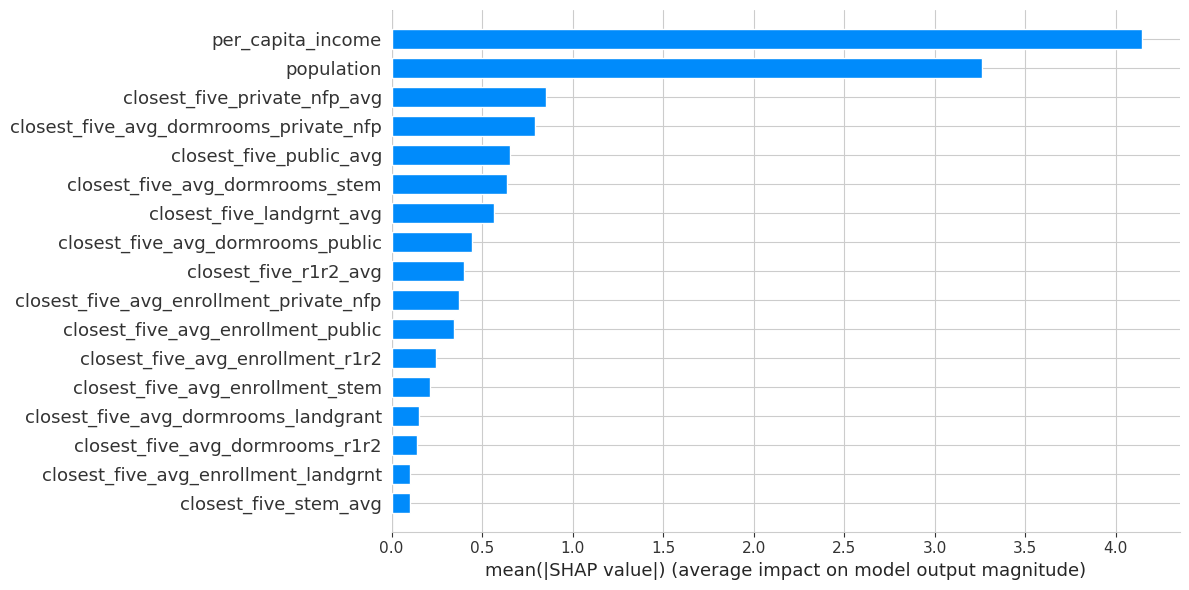

In [70]:
fig = plt.figure()
shap.summary_plot(
    shap_values, 
    X_train, 
    plot_type='bar', 
    show=False,
    plot_size=[12, 6]
)
#with open('../data/WI_pickled/shap_random_forest_bar_plot.pkl', 'wb') as f:
    #pickle.dump(fig, f) 
plt.show(fig)
plt.close()

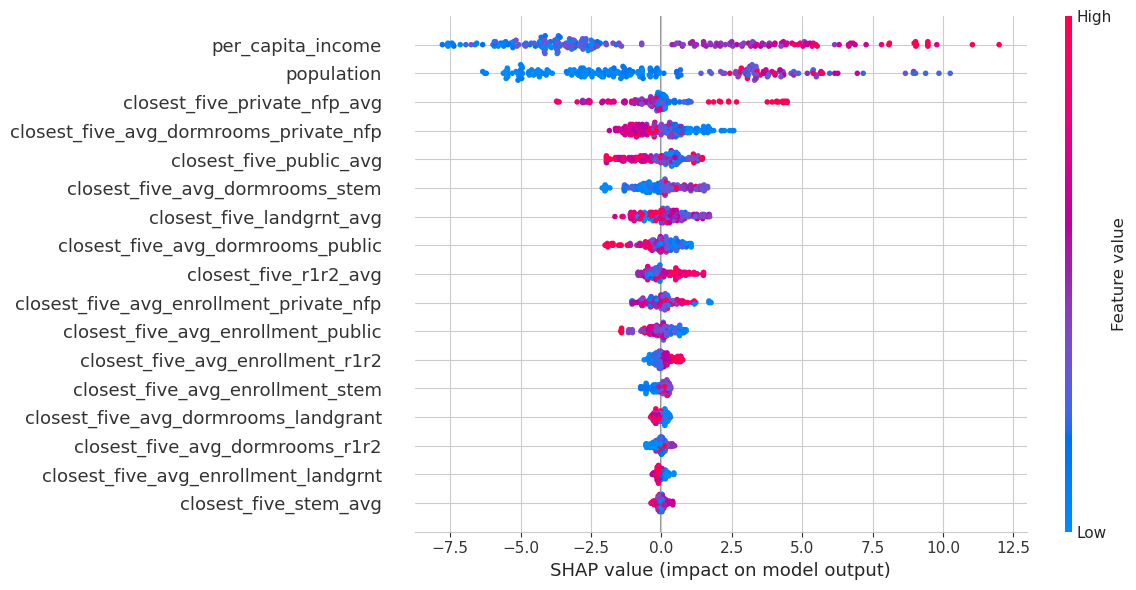

In [71]:
### the scatter plot
fig = plt.figure()
shap.summary_plot(shap_values, X_train, show=False, plot_size=[12, 6])
#with open('../data/WI_pickled/shap_random_forest_scatter_plot.pkl', 'wb') as f:
    #pickle.dump(fig, f) 
plt.show(fig)
plt.close()

### As expected, per capita income and population are the two most important features. But the contribution of the other features is not negligible.

# We will now use Random Forest model to make predictions on the testing data.

In [72]:
testing = pd.read_csv('../data/Wisconsin/train_test_split/testing.csv')

In [73]:
preds=random_forest.predict(testing[features])

In [74]:
## Creating predictions dataframe for side-by-side comparison with the actual values:

predictions = testing[['COUNTY','Year','PERCENT_3_OR_ABOVE']]
predictions['Predicted pass rate'] = preds

/tmp/ipykernel_1109242/3877465318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Predicted pass rate'] = preds


In [75]:
predictions

,COUNTY,Year,PERCENT_3_OR_ABOVE,Predicted pass rate
0,Jefferson,2019,63.516260,57.431453
1,Waushara,2020,43.956044,43.364202
2,Oneida,2018,65.202703,61.789865
3,Lincoln,2022,62.000000,61.651333
4,Rock,2019,58.988764,59.106337
...,...,...,...,...
65,Jefferson,2021,60.890152,58.783400
66,Grant,2020,47.745902,52.535586
67,Columbia,2019,59.398496,57.660745
68,Richland,2018,69.230769,41.496638


In [76]:
root_mean_squared_error(predictions['Predicted pass rate'],predictions['PERCENT_3_OR_ABOVE']) # Root mean squared error of our predictions.

np.float64(7.037542847007502)

In [77]:
r2_score(predictions['Predicted pass rate'],predictions['PERCENT_3_OR_ABOVE']) # R-squared coefficient of our predictions.

0.42173255829711487

<Figure size 640x480 with 0 Axes>

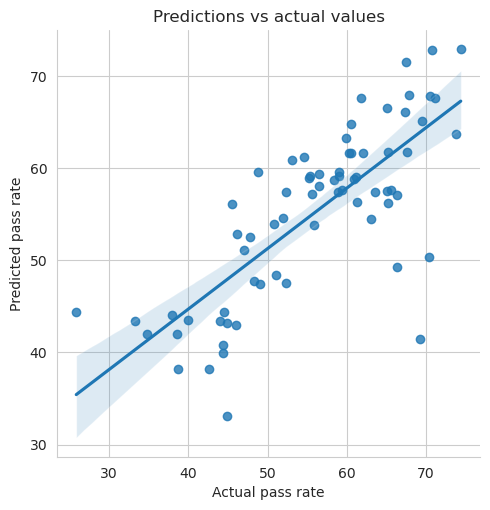

In [ ]:
plt.figure()
sns.lmplot(data=predictions,x='PERCENT_3_OR_ABOVE',y='Predicted pass rate')
plt.xlabel('Actual pass rate')
plt.title('Predictions vs actual values')
#plt.savefig('Testing_prediction_vs_actual.png')
plt.show()